In [2]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
sells = pd.read_csv('data/properati-AR-2017-08-01-properties-sell.csv')
sells.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,93.0,360.360360,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,NaN,...,220.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...
2,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
3,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...
4,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6544492346,-58.4895603251",...,103.0,616.666667,1796.116505,NaN,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA,https://thumbs4.properati.com/6/DsNJjCb5_zIPV0...


In [4]:
# con esto borro una columna del dataframe (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
sells = sells.drop(sells.columns[[0, 2, 5, 6, 8, 9, 14, 18, 19, 20, 24, 25, 26]], axis=1) 

In [5]:
sells.columns.values

array(['created_on', 'property_type', 'place_name', 'state_name', 'lat',
       'lon', 'price', 'currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'expenses',
       'properati_url'], dtype=object)

In [6]:
sells.head(100)

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,expenses,properati_url
0,2012-09-19,house,San Antonio De Padua,Bs.As. G.B.A. Zona Oeste,NaN,NaN,120000.0,USD,120000.0,333.0,93.0,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...
1,2012-10-22,house,San Antonio De Padua,Bs.As. G.B.A. Zona Oeste,NaN,NaN,220000.0,USD,220000.0,220.0,220.0,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...
2,2012-11-01,apartment,Mar del Plata,Buenos Aires Costa Atlántica,-38.019951,-57.526573,NaN,NaN,NaN,NaN,42.0,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...
3,2012-11-26,house,Sierra de los Padres,Buenos Aires Interior,-37.951193,-57.775289,NaN,NaN,NaN,661.0,265.0,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...
4,2012-12-08,house,Mataderos,Capital Federal,-34.654449,-58.489560,185000.0,USD,185000.0,300.0,103.0,5.0,NaN,http://www.properati.com.ar/4m4m_venta_casa_ma...
5,2013-01-04,apartment,Pilar,Bs.As. G.B.A. Zona Norte,-34.429071,-58.795418,97000.0,USD,97000.0,NaN,54.0,2.0,NaN,http://www.properati.com.ar/518a_venta_departa...
6,2013-01-09,store,San Isidro,Bs.As. G.B.A. Zona Norte,-34.478938,-58.521437,750000.0,USD,750000.0,NaN,NaN,1.0,NaN,http://www.properati.com.ar/52p4_venta_local_s...
7,2013-01-12,apartment,Mar del Plata,Buenos Aires Costa Atlántica,-38.005526,-57.546066,NaN,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/53yr_venta_terreno...
8,2013-01-21,house,San Martín de los Andes,Neuquén,-40.072045,-71.300218,480000.0,USD,480000.0,NaN,260.0,4.0,NaN,http://www.properati.com.ar/568j_venta_casa_sa...
9,2013-01-21,house,San Martín de los Andes,Neuquén,-40.313186,-71.385190,150000.0,USD,150000.0,NaN,80.0,3.0,NaN,http://www.properati.com.ar/568m_venta_casa_sa...


In [7]:
#filtro los datos del año 2012 para analizar solo los datos de los ultimos 4 años
sells = sells[sells['created_on'].str.contains(r'(2012-*-*)')==False]
sells.head(100)

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,expenses,properati_url
5,2013-01-04,apartment,Pilar,Bs.As. G.B.A. Zona Norte,-34.429071,-58.795418,97000.0,USD,97000.0,NaN,54.0,2.0,NaN,http://www.properati.com.ar/518a_venta_departa...
6,2013-01-09,store,San Isidro,Bs.As. G.B.A. Zona Norte,-34.478938,-58.521437,750000.0,USD,750000.0,NaN,NaN,1.0,NaN,http://www.properati.com.ar/52p4_venta_local_s...
7,2013-01-12,apartment,Mar del Plata,Buenos Aires Costa Atlántica,-38.005526,-57.546066,NaN,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/53yr_venta_terreno...
8,2013-01-21,house,San Martín de los Andes,Neuquén,-40.072045,-71.300218,480000.0,USD,480000.0,NaN,260.0,4.0,NaN,http://www.properati.com.ar/568j_venta_casa_sa...
9,2013-01-21,house,San Martín de los Andes,Neuquén,-40.313186,-71.385190,150000.0,USD,150000.0,NaN,80.0,3.0,NaN,http://www.properati.com.ar/568m_venta_casa_sa...
10,2013-01-26,apartment,Pilar,Bs.As. G.B.A. Zona Norte,-34.439241,-58.798589,100000.0,USD,100000.0,NaN,45.0,2.0,NaN,http://www.properati.com.ar/59ec_venta_departa...
11,2013-01-31,house,San Martín de los Andes,Neuquén,-40.160042,-71.350901,195000.0,USD,195000.0,NaN,124.0,4.0,NaN,http://www.properati.com.ar/5b9n_venta_casa_sa...
12,2013-02-08,house,Benavidez,Bs.As. G.B.A. Zona Norte,-34.402968,-58.729068,390000.0,USD,390000.0,NaN,375.0,6.0,NaN,http://www.properati.com.ar/5paq_venta_casa_be...
13,2013-02-15,apartment,Florida,Bs.As. G.B.A. Zona Norte,-34.533846,-58.489214,275000.0,USD,275000.0,NaN,111.0,4.0,NaN,http://www.properati.com.ar/5rsb_venta_departa...
14,2013-03-05,apartment,San Carlos de Bariloche,Río Negro,-41.133682,-71.318260,NaN,NaN,NaN,NaN,70.0,4.0,NaN,http://www.properati.com.ar/5yps_venta_departa...


In [8]:
#uso regex para buscar coincidencias por string
sells_caba = sells.loc[sells['state_name'].str.contains(r'(Capital Federal|capital federal)')]
sells_caba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               44151
property_type            44151
place_name               44151
state_name               44151
lat                      34179
lon                      34179
price                    39479
currency                 39479
price_aprox_usd          39479
surface_total_in_m2      35610
surface_covered_in_m2    40506
rooms                    22270
expenses                  8226
properati_url            44151
dtype: int64

In [9]:
#filtro barrio Capital Federal de caba
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
sells_caba.count()

created_on               41937
property_type            41937
place_name               41937
state_name               41937
lat                      33480
lon                      33480
price                    37679
currency                 37679
price_aprox_usd          37679
surface_total_in_m2      33771
surface_covered_in_m2    38697
rooms                    22058
expenses                  8057
properati_url            41937
dtype: int64

In [10]:
#uso regex para buscar coincidencias por string
sells_gba = sells.loc[sells['state_name'].str.contains(r'(G.B.A|Zona Norte|Zona Sur|Zona Este|Zona Oeste)')]
sells_gba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               80592
property_type            80592
place_name               80557
state_name               80592
lat                      41324
lon                      41324
price                    70721
currency                 70720
price_aprox_usd          70721
surface_total_in_m2      53772
surface_covered_in_m2    68671
rooms                    27651
expenses                  6687
properati_url            80592
dtype: int64

In [11]:
sells_caba_price = sells_caba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_caba_price.head(10)

,state_name,place_name,price_aprox_usd
42,Capital Federal,Barracas,140000.0
107,Capital Federal,Paternal,210000.0
162,Capital Federal,Barracas,80000.0
189,Capital Federal,Congreso,138000.0
295,Capital Federal,Villa Real,220000.0
347,Capital Federal,Villa Urquiza,175000.0
357,Capital Federal,Mataderos,215000.0
358,Capital Federal,Monserrat,190000.0
366,Capital Federal,Almagro,149000.0
371,Capital Federal,Villa Urquiza,123525.0


In [12]:
sells_caba_group = sells_caba_price.groupby('place_name')
sells_caba_group.mean()

,price_aprox_usd
place_name,
Abasto,2.447623e+05
Agronomía,1.680796e+05
Almagro,1.710584e+05
Balvanera,1.768734e+05
Barracas,2.055290e+05
Barrio Norte,3.135093e+05
Belgrano,3.781855e+05
Boca,1.884517e+05
Boedo,3.254074e+05


In [13]:
#defino cantidad de ventas por barrio
sells_caba_group_count = sells_caba_group.count()['state_name']
sells_caba_group_count.sort_values(ascending=False)

place_name
Belgrano               3796
Palermo                3788
Caballito              2838
Recoleta               2068
Villa Crespo           2016
Villa Urquiza          1979
Flores                 1792
Almagro                1620
Barrio Norte           1481
San Telmo              1452
Puerto Madero          1146
Boedo                  1063
Nuñez                  1009
Balvanera               970
San Cristobal           823
Monserrat               736
Floresta                703
Palermo Hollywood       680
Saavedra                672
Villa del Parque        640
Villa Devoto            622
Barracas                621
Villa Luro              590
Mataderos               578
Liniers                 559
Palermo Soho            520
Parque Patricios        472
Congreso                471
Colegiales              454
Retiro                  393
                       ... 
Once                    369
Boca                    347
Coghlan                 326
Palermo Chico           325
Chacarita

In [14]:
#como hay min 5 cantidad de ventas y max 3796, filtro por >= 15
sells_caba_group = sells_caba_price.groupby('place_name').agg([np.mean,np.size])
sells_caba_group = sells_caba_group.loc[sells_caba_group[('price_aprox_usd','size')]>=15,:]   
sells_caba_group.head()


price_aprox_usd        
                      mean    size
place_name                        
Abasto       244762.250530   209.0
Agronomía    168079.568966    64.0
Almagro      171058.398049  1620.0
Balvanera    176873.389017   970.0
Barracas     205529.026946   621.0

In [15]:
#top 10 CABA promedio
sells_caba_sort_desc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_caba_sort_desc.head(10)

price_aprox_usd        
                         mean    size
place_name                           
Palermo Chico    1.084513e+06   325.0
Puerto Madero    9.331024e+05  1146.0
Villa Soldati    4.538098e+05    23.0
Recoleta         4.511907e+05  2068.0
Palermo Viejo    4.091972e+05    70.0
Retiro           3.950799e+05   393.0
Belgrano         3.781855e+05  3796.0
Nuñez            3.701728e+05  1009.0
Palermo          3.508703e+05  3788.0
Las Cañitas      3.484389e+05   226.0

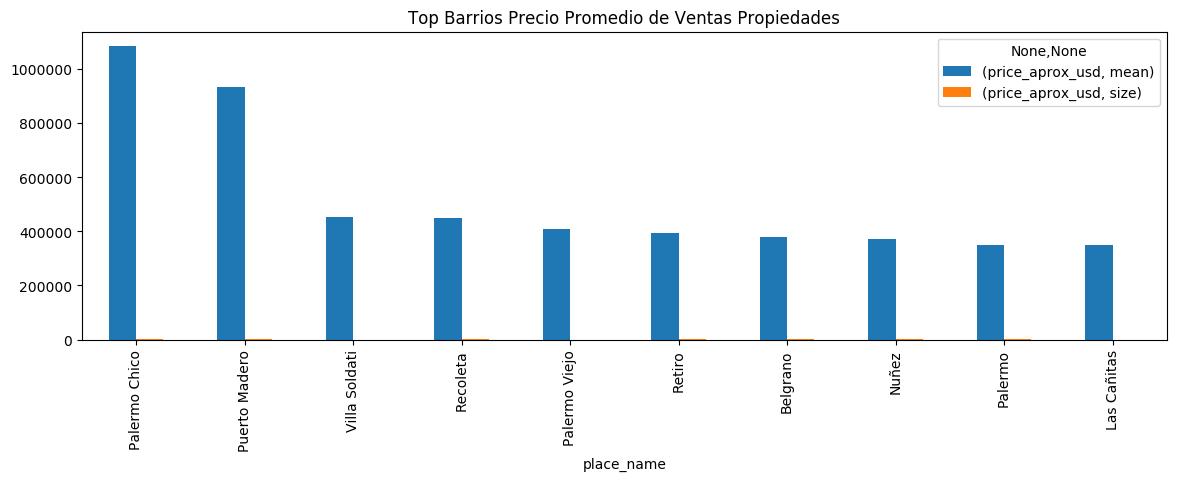

In [16]:
#top 10 CABA promedio
plt.figure()
plt.ylabel = "1"
sells_caba_sort_desc[0:10].plot(title = "Top Barrios Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [17]:
#TOP 10 CABA promedio Ascendente
sells_caba_sort_asc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_caba_sort_asc.head(10)

price_aprox_usd       
                             mean   size
place_name                              
Parque Chas         125885.452055   77.0
Constitución        126730.008121  287.0
Villa Lugano        133964.545338  289.0
Parque Avellaneda   138653.086420   85.0
Liniers             150046.078213  559.0
Monserrat           151434.054536  736.0
Chacarita           156227.331759  323.0
Paternal            159329.934733  294.0
Congreso            165589.212237  471.0
Agronomía           168079.568966   64.0

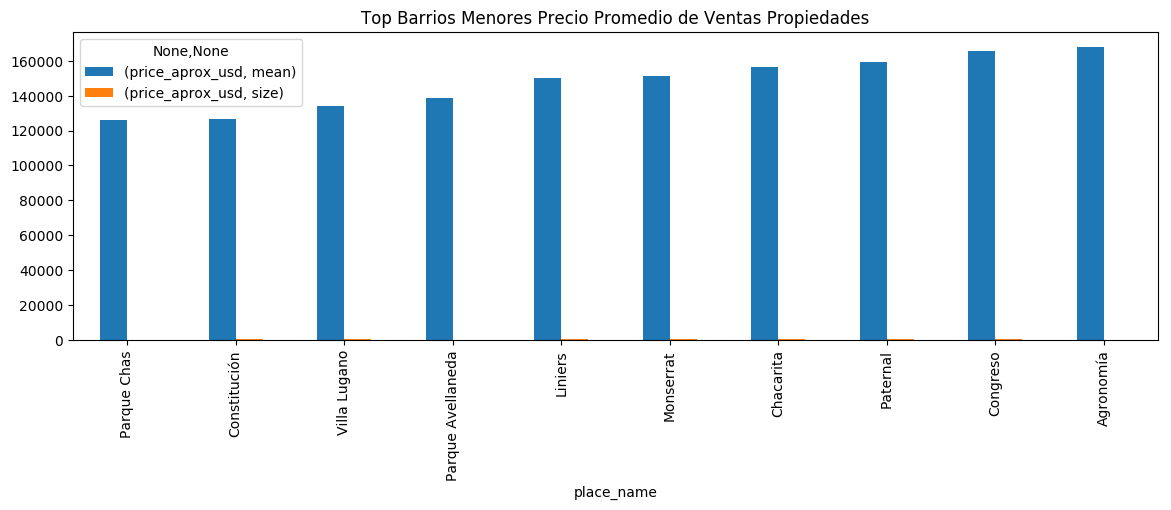

In [18]:
#top 10 CABA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_caba_sort_asc[0:10].plot(title = "Top Barrios Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


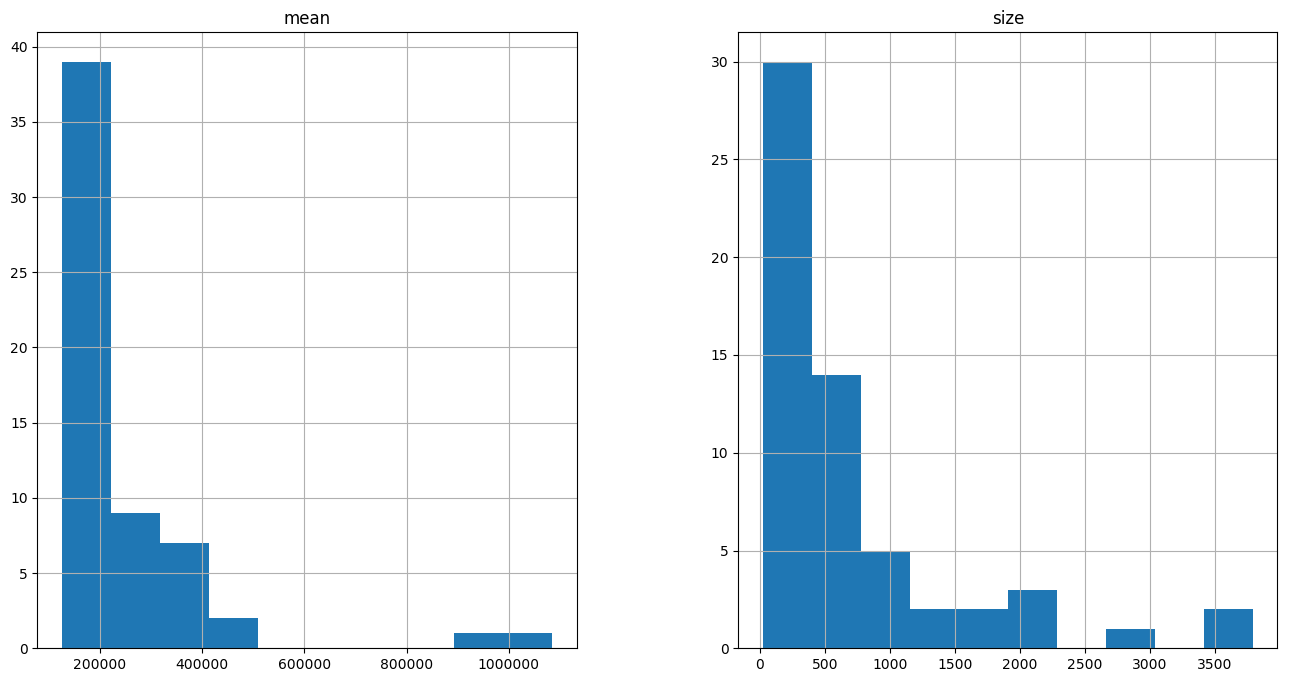

In [19]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
sells_caba_group['price_aprox_usd'].hist(figsize=(16,8));

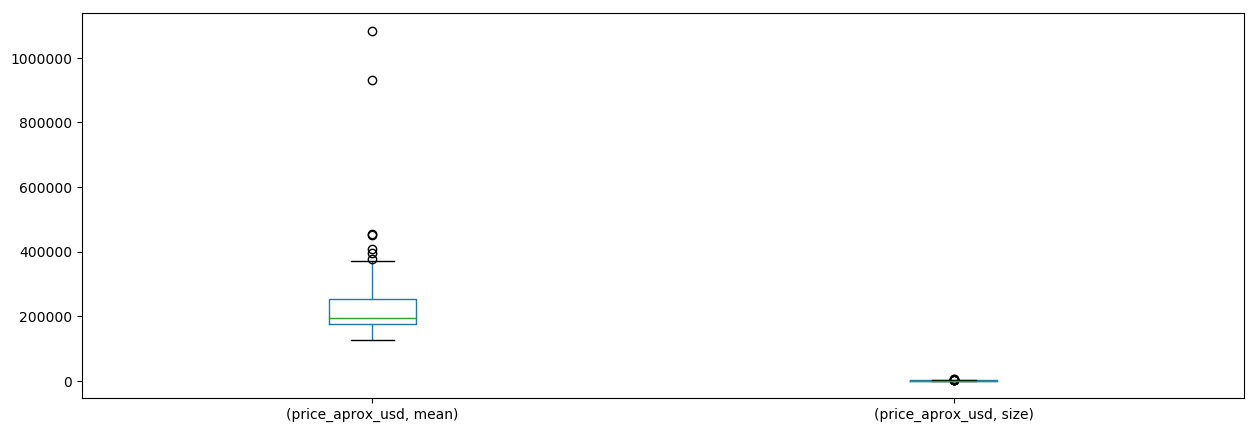

In [20]:
#concentracion de precios y cantidad de ventas
sells_caba_group.plot.box(figsize=(15,5));

In [21]:
sells_gba_price = sells_gba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_gba_price.head(10)

,state_name,place_name,price_aprox_usd
5,Bs.As. G.B.A. Zona Norte,Pilar,97000.0
6,Bs.As. G.B.A. Zona Norte,San Isidro,750000.0
10,Bs.As. G.B.A. Zona Norte,Pilar,100000.0
12,Bs.As. G.B.A. Zona Norte,Benavidez,390000.0
13,Bs.As. G.B.A. Zona Norte,Florida,275000.0
28,Bs.As. G.B.A. Zona Oeste,Haedo,NaN
29,Bs.As. G.B.A. Zona Oeste,Ramos Mejía,88000.0
30,Bs.As. G.B.A. Zona Oeste,Ramos Mejía,NaN
31,Bs.As. G.B.A. Zona Oeste,Villa Luzuriaga,52000.0
32,Bs.As. G.B.A. Zona Norte,San Isidro,550000.0


In [22]:
sells_gba_group = sells_gba_price.groupby("place_name")
sells_gba_group.head()

,state_name,place_name,price_aprox_usd
5,Bs.As. G.B.A. Zona Norte,Pilar,97000.0
6,Bs.As. G.B.A. Zona Norte,San Isidro,750000.0
10,Bs.As. G.B.A. Zona Norte,Pilar,100000.0
12,Bs.As. G.B.A. Zona Norte,Benavidez,390000.0
13,Bs.As. G.B.A. Zona Norte,Florida,275000.0
28,Bs.As. G.B.A. Zona Oeste,Haedo,NaN
29,Bs.As. G.B.A. Zona Oeste,Ramos Mejía,88000.0
30,Bs.As. G.B.A. Zona Oeste,Ramos Mejía,NaN
31,Bs.As. G.B.A. Zona Oeste,Villa Luzuriaga,52000.0
32,Bs.As. G.B.A. Zona Norte,San Isidro,550000.0


In [23]:
#defino cantidad de ventas por barrio
sells_gba_group_count = sells_gba_group.count()['state_name']
sells_gba_group_count.sort_values(ascending=False)

place_name
Nordelta                                 4949
Tigre                                    4692
Ramos Mejía                              4240
La Plata                                 3351
Pilar                                    3079
Olivos                                   2407
Morón                                    2170
Ituzaingó                                1892
Haedo                                    1735
Martínez                                 1728
Lomas de Zamora                          1722
San Isidro                               1598
San Miguel                               1504
Benavidez                                1486
Quilmes                                  1289
Escobar                                  1250
Castelar                                 1165
Caseros                                  1139
Villa Luzuriaga                          1126
Banfield                                 1109
Lanús                                    1106
San Fernando           

In [24]:
#como los barrios cerrados tienen 1 cantidad de venta los filtro para llegar a un buen resultado 
#ells_gba = sells_gba[sells_gba['place_name'].str.contains(r'(Cerrado|cerrado|arrio errado)')==False]
#ells_gba.head()

In [25]:
#como hay min 1 cantidad de ventas y max 4949, filtro por >= 50
sells_gba_group = sells_gba_price.groupby('place_name').agg([np.mean,np.size])
sells_gba_group = sells_gba_group.loc[sells_gba_group[('price_aprox_usd','size')]>=50,:]   
sells_gba_group.head(100)

price_aprox_usd        
                                           mean    size
place_name                                             
Acassuso                          710082.134571   440.0
Adrogué                           276643.765847   825.0
Avellaneda                        138089.047808   536.0
Banfield                          198258.388042  1109.0
Barrio El Golf                    362834.943966    58.0
Barrio La Alameda                 394833.333333    67.0
Barrio Los Alisos                 355065.665484   314.0
Barrio Los Lagos                  615116.129032    62.0
Barrio San Gabriel                358042.016807   120.0
Barrio Santa Teresa               386764.294528    53.0
BarrioPortezuelo                  199875.000000    79.0
Beccar                            443124.891640   685.0
Bella Vista                       230196.264182   417.0
Belén de Escobar                  233556.569124   296.0
Benavidez                         404938.326404  1486.0
Berazategui                       313160.349112   375.0
Bernal                            170022.246118   249.0
Boulogne Sur Mer                  205439.489189   334.0
Bs.As. G.B.A. Zona Norte          295351.840575   395.0
Bs.As. G.B.A. Zona Oeste          190666.275895   335.0
Burzaco                           138259.487680   559.0
Canning                           236403.911176   386.0
Carapachay                        175911.515152   167.0
Caseros                           114383.602023  1139.0
Castelar                          220033.391503  1165.0
Cañuelas                          220586.956522    61.0
City Bell                         337438.820855   357.0
Ciudad Evita                      184159.090909    56.0
Ciudad Jardín Lomas del Palomar   207858.333333   110.0
Ciudadela                          97676.079741   505.0
...                                         ...     ...
Llavallol                         194997.520278   151.0
Loma Hermosa                      148833.333333    64.0
Loma Verde                        310346.774194    63.0
Lomas de Zamora                   200337.981208  1722.0
Lomas del Mirador                 133098.698728   521.0
Longchamps                        134774.275812   164.0
Los Pingüinos Country Club        750000.000000   317.0
Los Polvorines                    312588.328626   189.0
Luis Guillón                      144804.878049    50.0
Malvinas Argentinas               394435.364878   186.0
Manuel B Gonnet                   280350.486908   234.0
Marcos Paz                        132224.605469    67.0
Martín Coronado                   109439.792432   128.0
Martínez                          472497.768105  1728.0
Maschwitz                         245617.978119   342.0
Mayling Club de Campo             542988.764045    94.0
Merlo                             126117.086684   384.0
Monte Grande                      160860.113529   333.0
Moreno                            300163.247457   879.0
Morón                             161769.250519  2170.0
Munro                             164758.084420   230.0
Muñiz                             120612.684492   413.0
Nordelta                          419121.102383  4949.0
Olivos                            331523.798388  2407.0
Olivos Golf Club                  474700.000000    53.0
Parque Leloir                     366812.750473   174.0
Paso del Rey                      130333.676316   101.0
Pilar                             286243.757194  3079.0
Pilar Village                      74690.167164    69.0
Presidente Perón                  281830.798736    94.0

[100 rows x 2 columns]

In [26]:
#top 10 GBA promedio
sells_gba_sort_desc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_gba_sort_desc.head(10)

price_aprox_usd        
                                        mean    size
place_name                                          
Santa Barbara Barrio Cerrado   781538.260870   117.0
Los Pingüinos Country Club     750000.000000   317.0
Acassuso                       710082.134571   440.0
Barrio Los Lagos               615116.129032    62.0
Mayling Club de Campo          542988.764045    94.0
Olivos Golf Club               474700.000000    53.0
Martínez                       472497.768105  1728.0
Vicente López                  449455.756631  1005.0
San Isidro                     446458.133680  1598.0
Beccar                         443124.891640   685.0

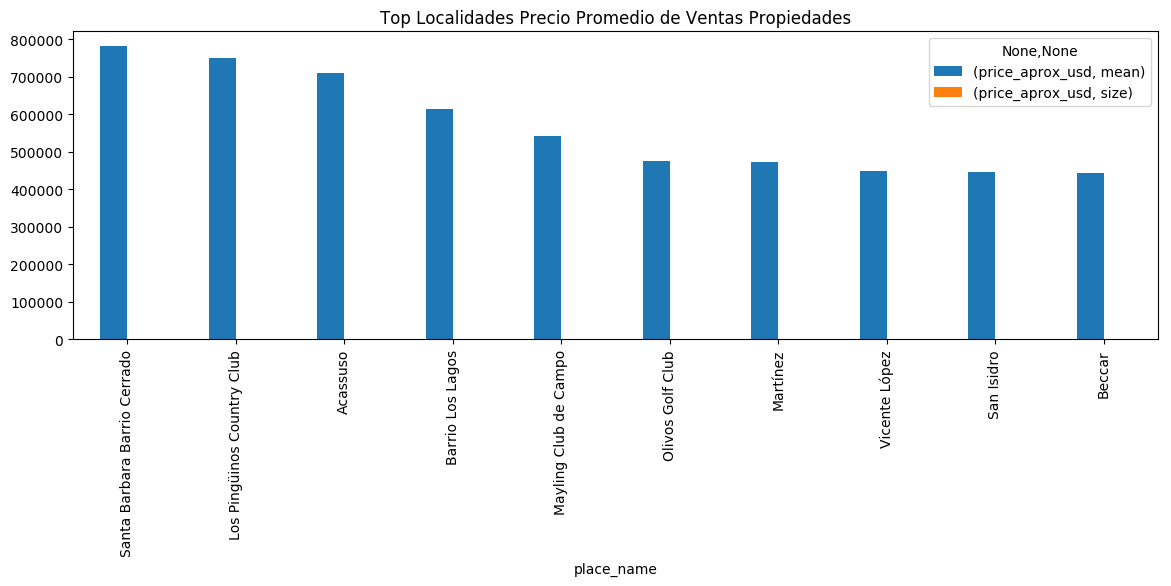

In [27]:
#top 10 GBA promedio
plt.figure()
plt.ylabel = "1"
sells_gba_sort_desc[0:10].plot(title = "Top Localidades Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [28]:
#top 10 GBA promedio Ascendente
sells_gba_sort_asc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_gba_sort_asc.head(10)

price_aprox_usd       
                            mean   size
place_name                             
Pilar Village       74690.167164   69.0
Claypole            80899.724717   54.0
Virrey del Pino     84408.358769   65.0
Villa Tesei         93602.475645   94.0
Ciudadela           97676.079741  505.0
Villa Libertad      98074.788983   67.0
Florencio Varela   103897.560976   61.0
La Reja            108725.397500   78.0
Martín Coronado    109439.792432  128.0
José C Paz         109525.515000  237.0

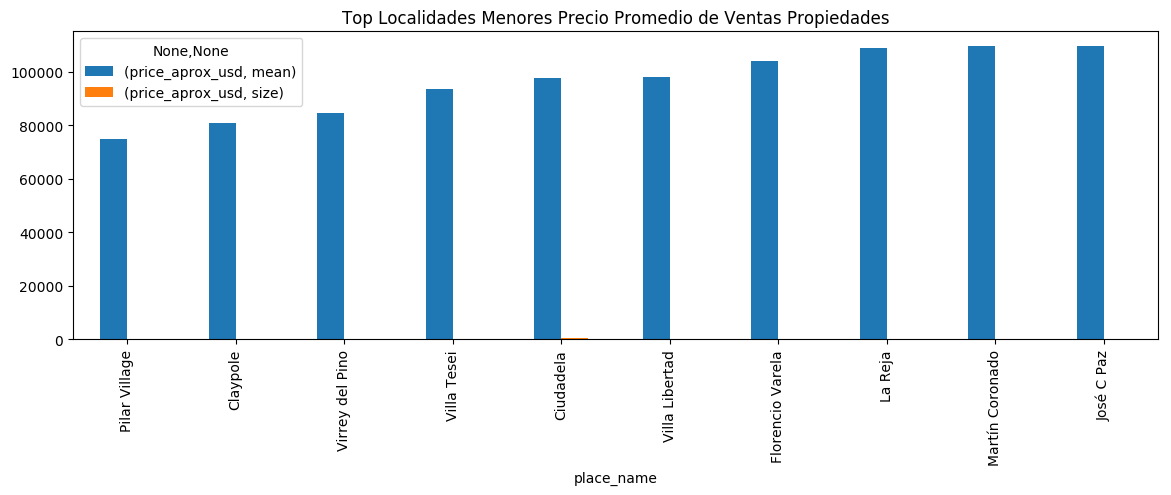

In [29]:
#top 10 GBA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_gba_sort_asc[0:10].plot(title = "Top Localidades Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


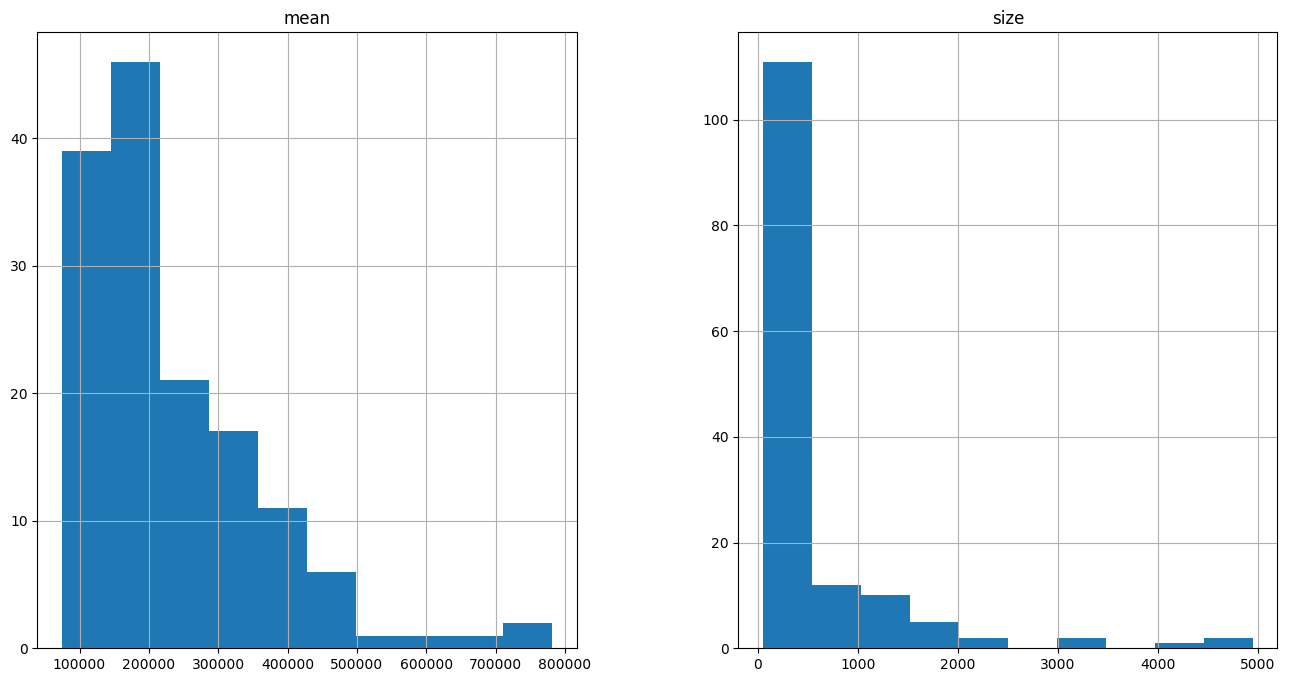

In [30]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
sells_gba_group['price_aprox_usd'].hist(figsize=(16,8));

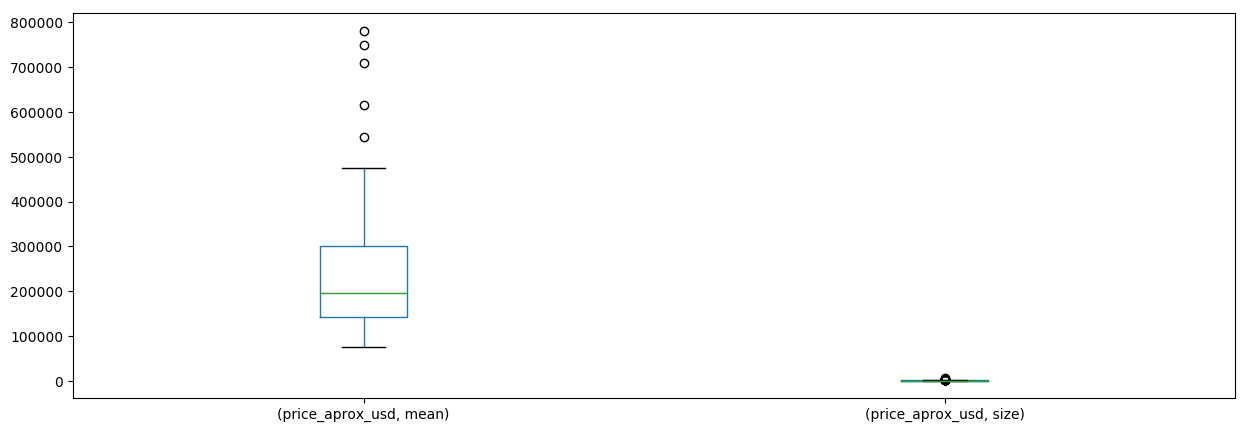

In [31]:
#concentracion de promedio precios y cantidad de ventas
sells_gba_group.plot.box(figsize=(15,5));

In [32]:
#cantidad ventas de tipo de propiedades en CABA
sells_caba_property = sells_caba.loc[:,['property_type','place_name']]
sells_caba_property.head(10)

,property_type,place_name
42,house,Barracas
107,house,Paternal
162,apartment,Barracas
189,apartment,Congreso
295,house,Villa Real
347,apartment,Villa Urquiza
357,house,Mataderos
358,store,Monserrat
366,apartment,Almagro
371,apartment,Villa Urquiza


In [33]:
sells_caba_property_group = sells_caba_property.groupby('property_type').agg([np.size])
sells_caba_property_group_count = sells_caba_property_group.sort_values(('place_name','size'), ascending=False)
sells_caba_property_group_count.head(10)

,place_name
,size
property_type,
apartment,34930
house,2493
PH,2469
store,2045


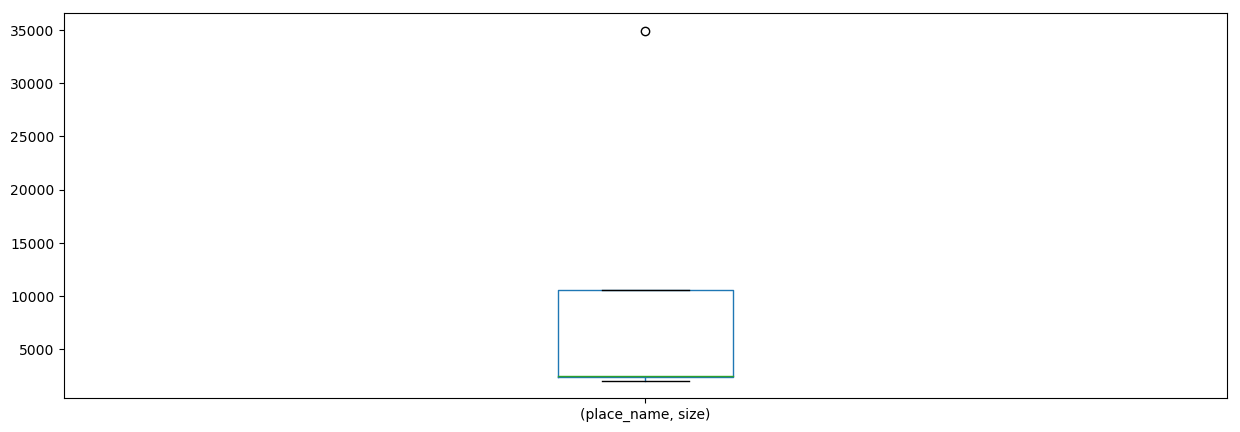

In [34]:
#concentracion de cantidad de ventas por tipo de propiedad
sells_caba_property_group_count['place_name','size'].plot.box(figsize=(15,5));

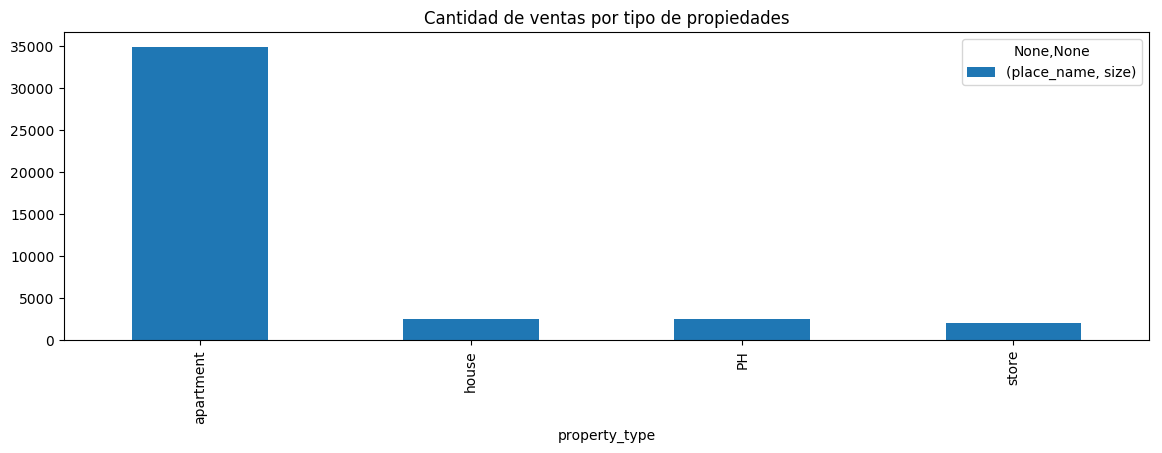

In [35]:
#cantidad de ventas por tipo de propiedades en CABA
sells_caba_property_group_count[0:10].plot(title = "Cantidad de ventas por tipo de propiedades",kind='bar',figsize=(14,4))

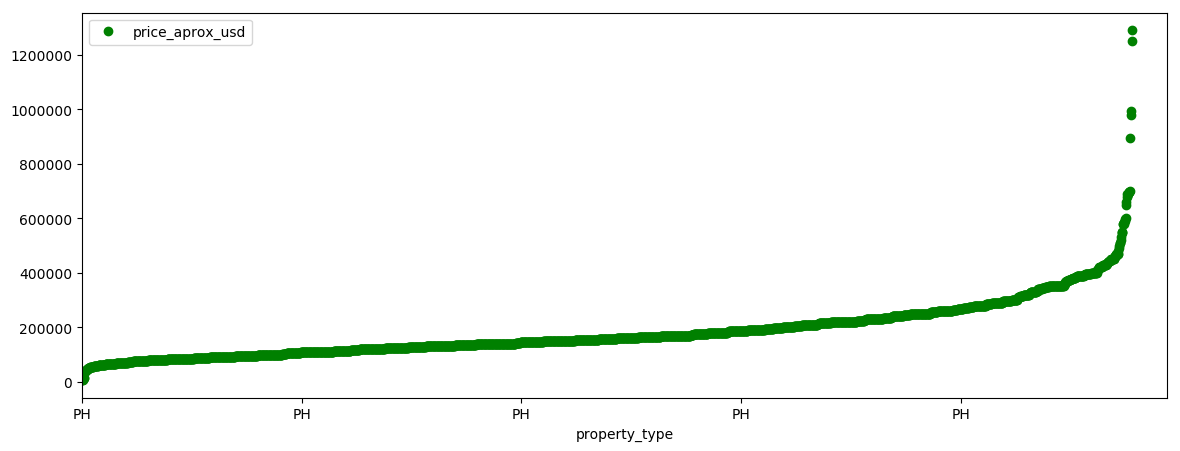

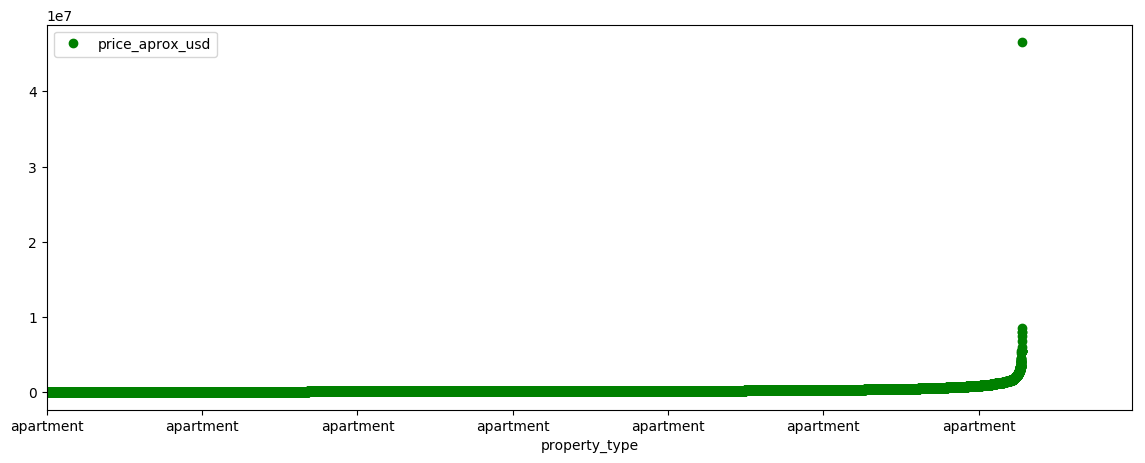

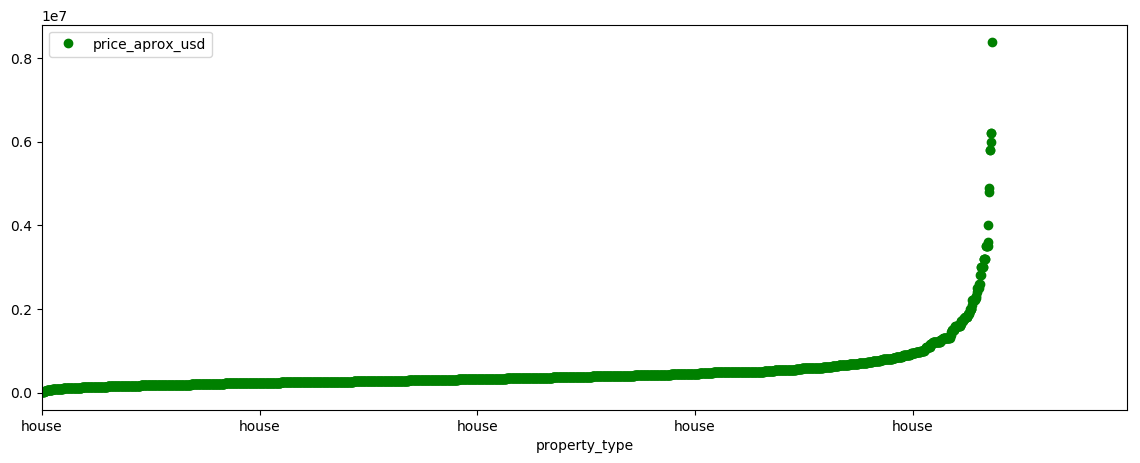

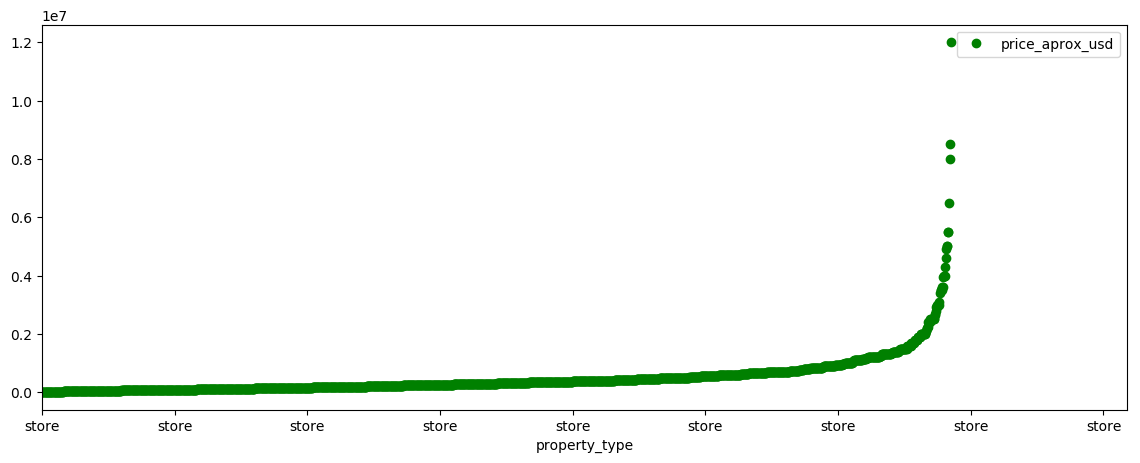

In [36]:
#distribucion de precios por tipo de propiedad en CABA
sells_caba_distr = sells_caba.sort_values(by='price_aprox_usd', ascending=True)
sells_caba_distr = sells_caba_distr.groupby('property_type')
sells_caba_distr.plot(x='property_type' , y='price_aprox_usd', style='go',figsize=(14,5))
plt.show()

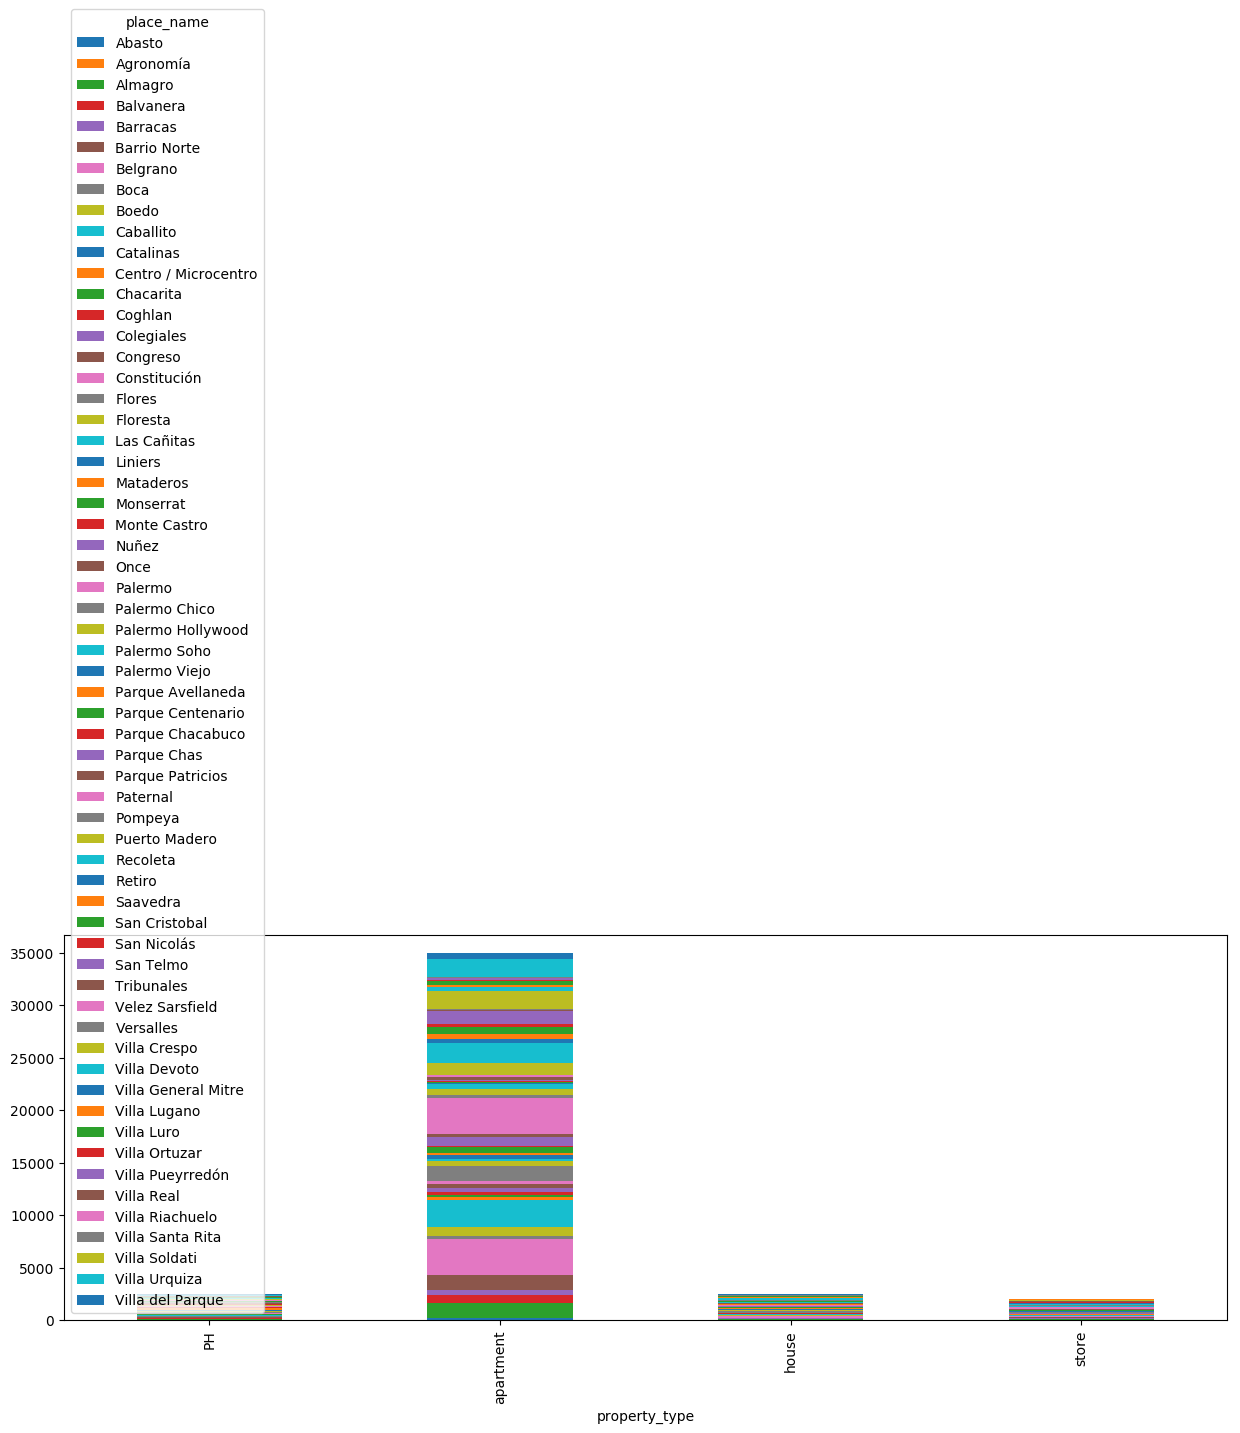

In [46]:
#proporciones de tipos de propiedades distribuidas en distintos barrios
sells_caba_compare = sells_caba_property.groupby(['property_type', 'place_name'])['property_type'].count().unstack('place_name').fillna(0)
sells_caba_compare.plot(kind='bar', stacked=True)

In [37]:
#cantidad ventas de tipo de propiedades en GBA
sells_gba_property = sells_gba.loc[:,['property_type','place_name']]
sells_gba_property.head(10)

,property_type,place_name
5,apartment,Pilar
6,store,San Isidro
10,apartment,Pilar
12,house,Benavidez
13,apartment,Florida
28,house,Haedo
29,apartment,Ramos Mejía
30,house,Ramos Mejía
31,apartment,Villa Luzuriaga
32,house,San Isidro


In [38]:
sells_gba_property_group = sells_gba_property.groupby('property_type').agg([np.size])
sells_gba_property_group_count = sells_gba_property_group.sort_values(('place_name','size'), ascending=False)
sells_gba_property_group_count.head(10)

,place_name
,size
property_type,
house,40754
apartment,32921
PH,4497
store,2420


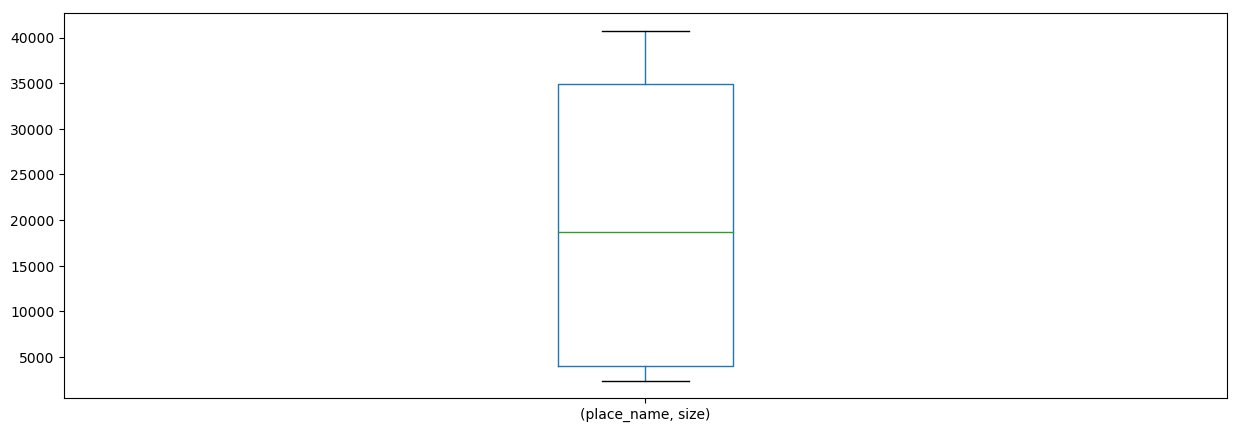

In [39]:
#concentracion de cantidad de ventas por tipo de propiedad
sells_gba_property_group_count['place_name','size'].plot.box(figsize=(15,5));

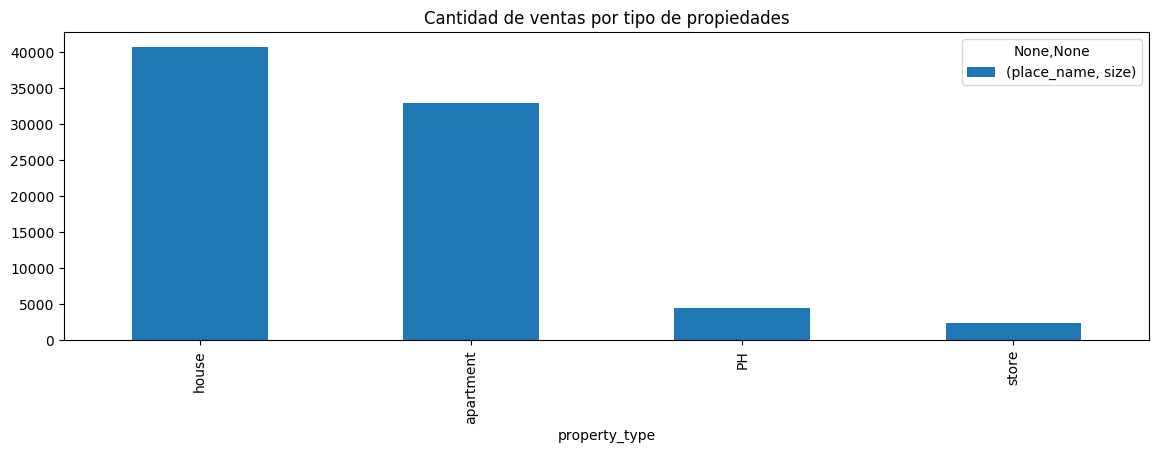

In [40]:
#cantidad de ventas por tipo de propiedades en CABA
sells_gba_property_group_count[0:10].plot(title = "Cantidad de ventas por tipo de propiedades",kind='bar',figsize=(14,4))

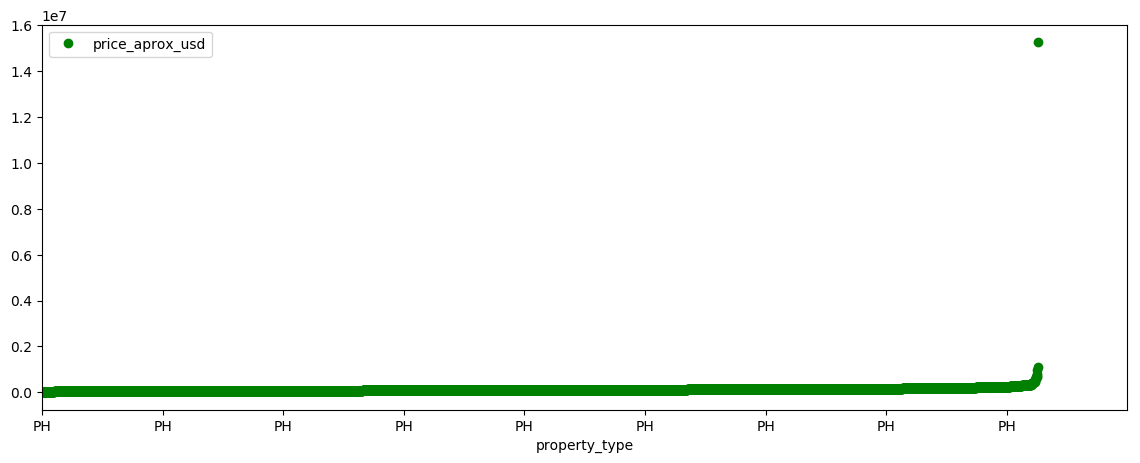

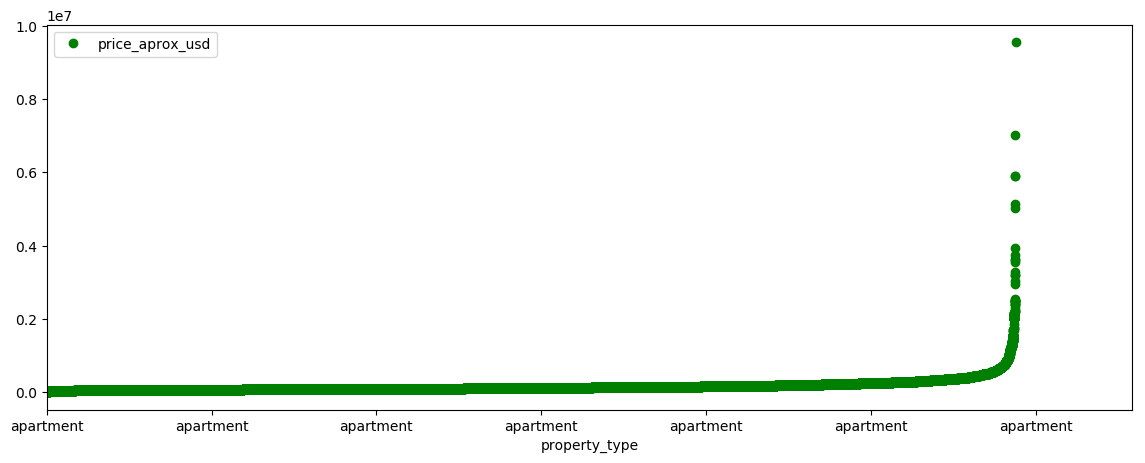

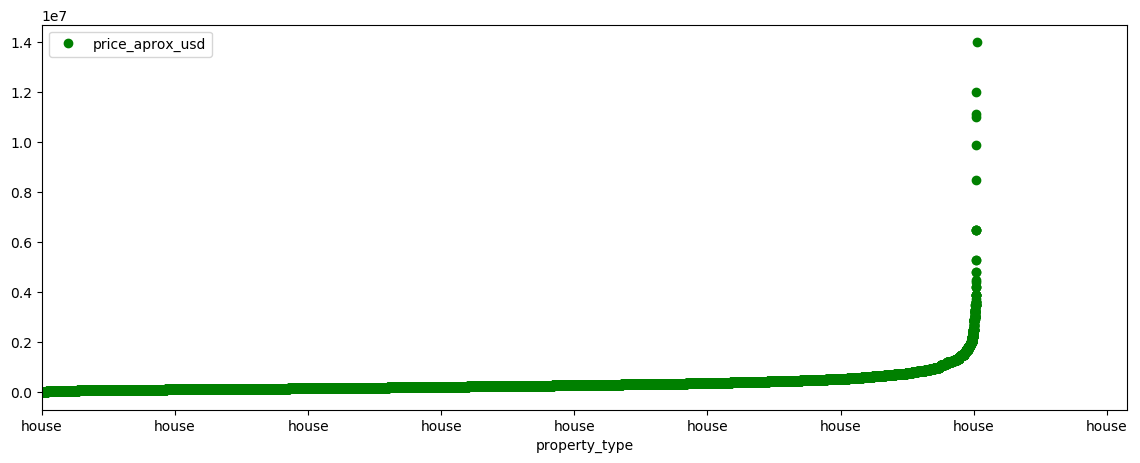

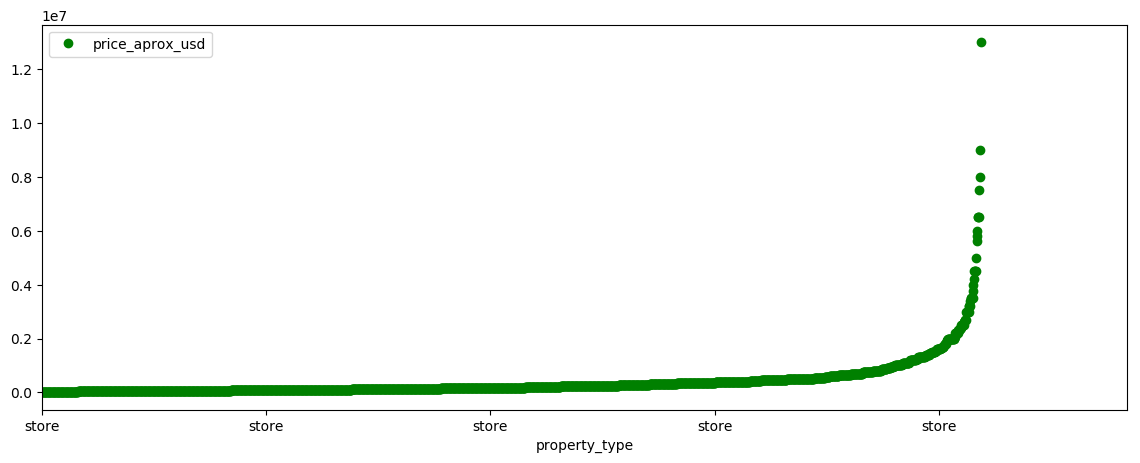

In [41]:
#distribucion de precios por tipo de propiedad en GBA - 
sells_gba_distr = sells_gba.sort_values(by='price_aprox_usd', ascending=True)
sells_gba_distr = sells_gba_distr.groupby('property_type')
sells_gba_distr.plot(x='property_type' , y='price_aprox_usd', style='go',figsize=(14,5))
plt.show()

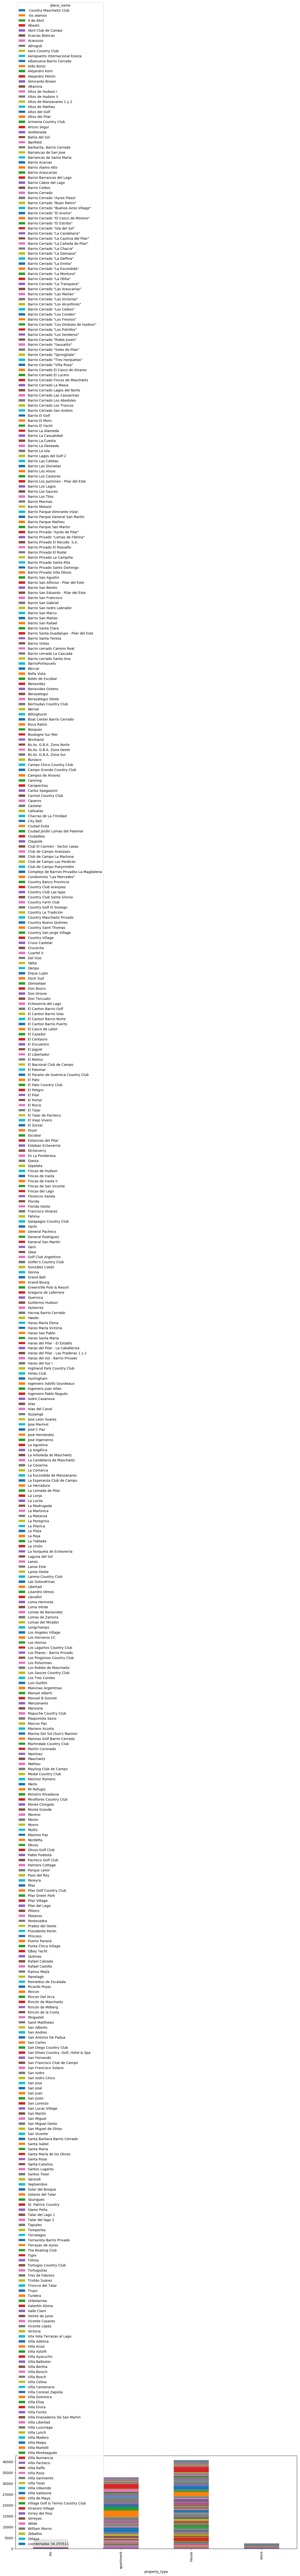

In [45]:
#proporciones de tipos de propiedades distribuidas en distintas localidades
sells_gba_compare = sells_gba_property.groupby(['property_type', 'place_name'])['property_type'].count().unstack('place_name').fillna(0)
sells_gba_compare.plot(kind='bar', stacked=True)